#### Preliminary Information

In this project, I take a look at SAT score averages of college-bound seniors and percentage of graduates taking SAT, by state or jurisdiction for the year 2000-2001. The data is taken from the [National Center for Education Statistics](https://nces.ed.gov/programs/digest/d07/tables/dt07_137.asp).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

df = pd.read_csv('../data/sat_scores.csv')
print(df.head())
print(df.tail())
print(df.shape)

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
   State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514
(52, 4)


In [2]:
print(df.isnull().sum())
print('')
print 'Average Verbal score across all states & DC:', sum(df.Verbal[:-1]) / 51.
print 'Average Math score across all states & DC:', sum(df.Math[:-1]) / 51.

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

Average Verbal score across all states & DC: 532.529411765
Average Math score across all states & DC: 531.843137255


#### Describing the data

The data contain 52 rows representing the 50 US states, DC and All. For each row, the ```State``` column lists the state, the ```Rate``` column represents the percent of high school graduates taking the SAT, the ```Math``` column represents the average Math section score in the state and the ```Verbal``` column represents the average Verbal section score in the state.

The data look complete and the only issue I'm having with the observations is the 52nd row with ```All``` in the ```State``` column. It's not the average across all states but the numbers differ from what I calculate the nationwide averages to be. This row is also not in the original NCES data, so I'm going to take it out.

In [3]:
df = df.drop([51])
print(df.head())
print(df.tail())

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
   State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


##### Create a data dictionary for the dataset.

Below, I create a dictionary with the column names as the keys and the values in each column as the dictionary values. This is not a particularly helpful dictionary because there is no easy way to know which scores correspond to which states.

In [4]:
data_dict = {'State': df.State.tolist(),
             'Rate':df.Rate.tolist(),
             'Verbal':df.Verbal.tolist(),
             'Math': df.Math.tolist()
             }

print data_dict

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 5

##### Load the data into a list of lists

Here, I simply transform the pandas dataframe into a list of lists, where each column in the dataframe is a list in the list of lists.

In [5]:
data = df.values.T.tolist()

##### Print the data

In [6]:
print data

[['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566], [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 5

##### Extract a list of the labels from the data, and remove them from the data.

In [7]:
labels = data_dict.keys() # Extract a list of the labels from the data
print labels
print ''
print data

['Math', 'State', 'Rate', 'Verbal']

[['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566], [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568,

##### Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [8]:
names = data[0] # list of States names extracted from the data
print names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [9]:
#for i in range(len(data)):
#    for j in range(len(names)):
#        print type(data[i][j])
#    print ''

print 'Type of State column: ', df.State.dtype
print 'Type of Rate column: ', df.Rate.dtype
print 'Type of Verbal column: ', df.Verbal.dtype
print 'Type of Maath column: ', df.Math.dtype

Type of State column:  object
Type of Rate column:  int64
Type of Verbal column:  int64
Type of Maath column:  int64


##### Do any types need to be reassigned? If so, go ahead and do it.

State names are all ```object``` and Rate, Verbal and Math are all ```int64```, so no types need to be reassigned.

##### Create a dictionary for each column mapping the State to its respective value for that column. 

Below, I create 3 different dictionaries: a rate dictionary, a verbal dictionary, and a math dictionary and each dictionary has the State name as the key and the participation rate, average verbal score, and average math score for that state in each dictionary, respectively.

In [10]:
rate_dict = {}
verb_dict = {}
math_dict = {}

for i in df.index:
    rate_dict[df.State.ix[i]] = df.Rate.ix[i]
    verb_dict[df.State.ix[i]] = df.Verbal.ix[i]
    math_dict[df.State.ix[i]] = df.Math.ix[i]

print rate_dict
print ''
print verb_dict
print ''
print math_dict

{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}

{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577, 'MN': 580, 'MI': 561, 'KS': 577, 'MT': 

##### Create a dictionary with the values for each of the numeric columns

This is essentially a combindation of the 3 dictionaries from above.

In [11]:
state_dict = {}

for i in df.index:
    state_dict[df.State.ix[i]] = df.Rate.ix[i], df.Verbal.ix[i], df.Math.ix[i]

print state_dict

{'WA': (53, 527, 527), 'DE': (67, 501, 499), 'DC': (56, 482, 474), 'WI': (6, 584, 596), 'WV': (18, 527, 512), 'HI': (52, 485, 515), 'FL': (54, 498, 499), 'WY': (11, 547, 545), 'NH': (72, 520, 516), 'NJ': (81, 499, 513), 'NM': (13, 551, 542), 'TX': (53, 493, 499), 'LA': (7, 564, 562), 'NC': (65, 493, 499), 'ND': (4, 592, 599), 'NE': (8, 562, 568), 'TN': (13, 562, 553), 'NY': (77, 495, 505), 'PA': (71, 500, 499), 'RI': (71, 501, 499), 'NV': (33, 509, 515), 'VA': (68, 510, 501), 'CO': (31, 539, 542), 'AK': (51, 514, 510), 'AL': (9, 559, 554), 'AR': (6, 562, 550), 'VT': (69, 511, 506), 'IL': (12, 576, 589), 'GA': (63, 491, 489), 'IN': (60, 499, 501), 'IA': (5, 593, 603), 'OK': (8, 567, 561), 'AZ': (34, 523, 525), 'CA': (51, 498, 517), 'ID': (17, 543, 542), 'CT': (82, 509, 510), 'ME': (69, 506, 500), 'MD': (65, 508, 510), 'MA': (79, 511, 515), 'OH': (26, 534, 439), 'UT': (5, 575, 570), 'MO': (8, 577, 577), 'MN': (9, 580, 589), 'MI': (11, 561, 572), 'KS': (9, 577, 580), 'MT': (23, 539, 539),

## Describe the data

##### Print the min and max of each column

In [12]:
print 'State(s) with the minimum participation rates:'
print df[df.Rate == min(df.Rate)]
print ''
print 'State(s) with the maximum participation rates:'
print df[df.Rate == max(df.Rate)]
print ''
print 'State(s) with the minimum average verbal scores:'
print df[df.Verbal == min(df.Verbal)]
print ''
print 'State(s) with the maximum average verbal scores:'
print df[df.Verbal == max(df.Verbal)]
print ''
print 'State(s) with the minimum average math scores:'
print df[df.Math == min(df.Math)]
print ''
print 'State(s) with the maximum average math scores:'
print df[df.Math == max(df.Math)]
print ''

State(s) with the minimum participation rates:
   State  Rate  Verbal  Math
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

State(s) with the maximum participation rates:
  State  Rate  Verbal  Math
0    CT    82     509   510

State(s) with the minimum average verbal scores:
   State  Rate  Verbal  Math
16    DC    56     482   474

State(s) with the maximum average verbal scores:
   State  Rate  Verbal  Math
47    IA     5     593   603

State(s) with the minimum average math scores:
   State  Rate  Verbal  Math
27    OH    26     534   439

State(s) with the maximum average math scores:
   State  Rate  Verbal  Math
47    IA     5     593   603



##### Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
import math
import numpy as np

def std(col):
    std = math.sqrt(sum((df[col] - np.mean(df[col])) ** 2) / (len(df) - 1))
    return std

print('Standard Deviation for Participation Rate: ' + str(std('Rate')))
print('Standard Deviation for Average Verbal Score: ' + str(std('Verbal')))
print('Standard Deviation for Average Math Score: ' + str(std('Math')))

Standard Deviation for Participation Rate: 27.5506805724
Standard Deviation for Average Verbal Score: 33.3606672242
Standard Deviation for Average Math Score: 36.2873931547


## Visualize the data

##### Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

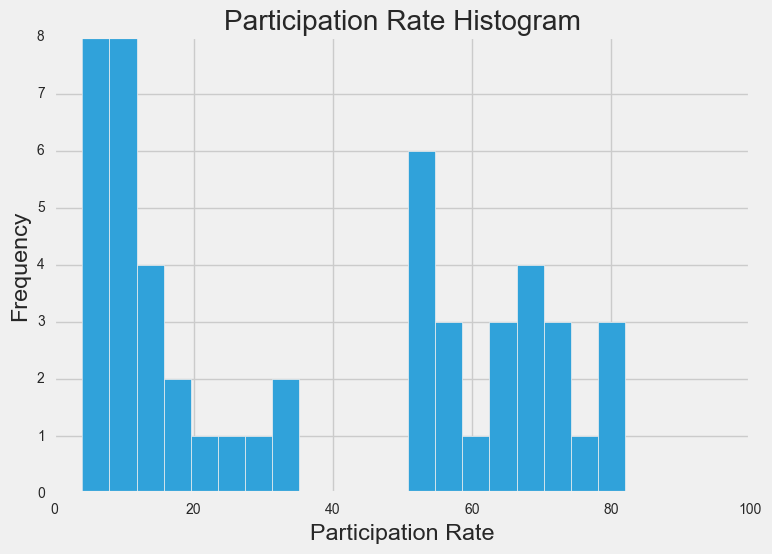

In [14]:
plt.hist(df.Rate, bins=20)
plt.xlim(0, 100)
plt.xlabel('Participation Rate')
plt.ylabel('Frequency')
plt.title('Participation Rate Histogram')

This histogram has a clear bimodal distribution. There is a set of states where the participation is below 40% and another set where participation rate is above 40%.

##### Plot the Math distribution

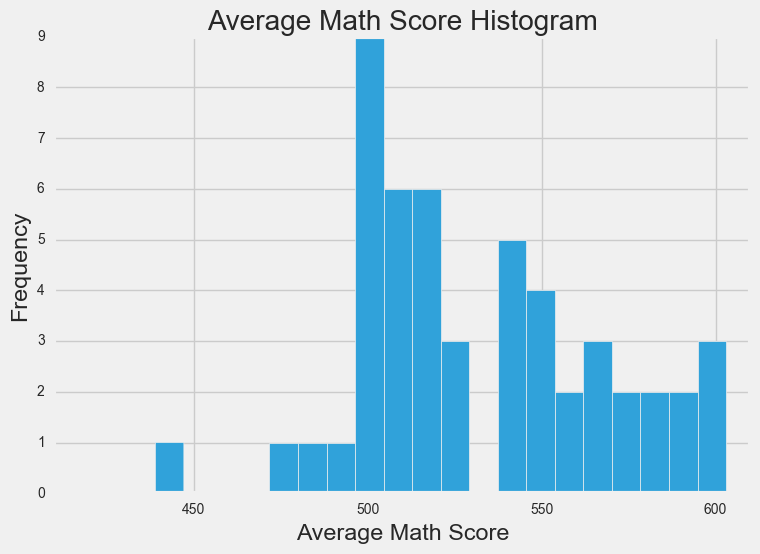

In [15]:
plt.hist(df.Math, bins=20)
plt.xlim(410, 610)
plt.xlabel('Average Math Score')
plt.ylabel('Frequency')
plt.title('Average Math Score Histogram')

One state (which I know to be Ohio from printing the minimum average math score earlier has a *much* lower average math score than all of the other states.

##### 16. Plot the Verbal distribution

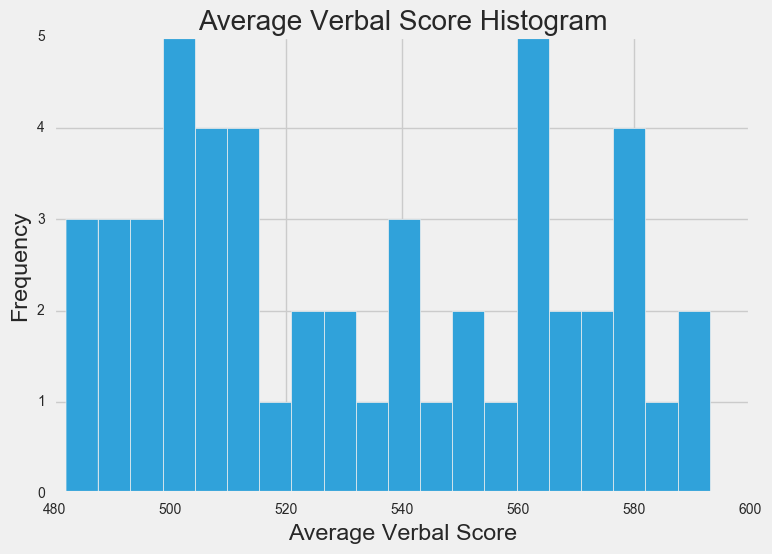

In [16]:
plt.hist(df.Verbal, bins=20)
plt.xlim(480, 600)
plt.xlabel('Average Verbal Score')
plt.ylabel('Frequency')
plt.title('Average Verbal Score Histogram')

##### What is the typical assumption for data distribution?

The typical assumption for data distribution is that is it normally distributed.

##### Does that distribution hold true for our data?

That distribution does not hold true for our data.

##### Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

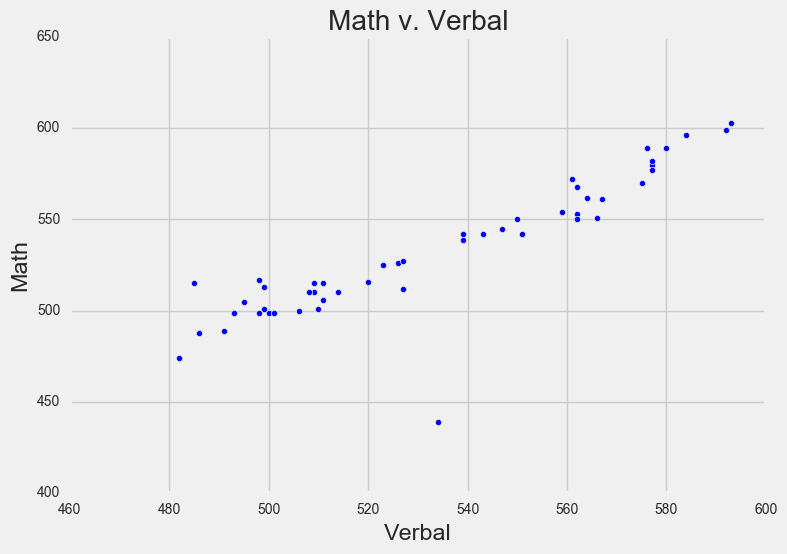

In [17]:
plt.scatter(df.Verbal, df.Math)
plt.xlabel('Verbal')
plt.ylabel('Math')
plt.title('Math v. Verbal')

Ohio is a pretty clear outlier, so I'm going to check the source data to make sure something isn't amiss. The true data says Ohio's average Verbal score is 534 and average Math score is 539. Let's take a look at our data:

In [18]:
df[df.State == 'OH']

,State,Rate,Verbal,Math
27,OH,26,534,439


There was indeed a data entry error, so I change Ohio's average math score from 439 to 539.

In [19]:
df.Math[27] = 539

/Users/avinashtamby/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df[df.State == 'OH']

,State,Rate,Verbal,Math
27,OH,26,534,539


Now, I find the actual state that has the lowest average math score, replot the math distribution and replot the math v. verbal scatter plot.

In [21]:
print 'State(s) with the minimum average math scores:'
print df[df.Math == min(df.Math)]

State(s) with the minimum average math scores:
   State  Rate  Verbal  Math
16    DC    56     482   474


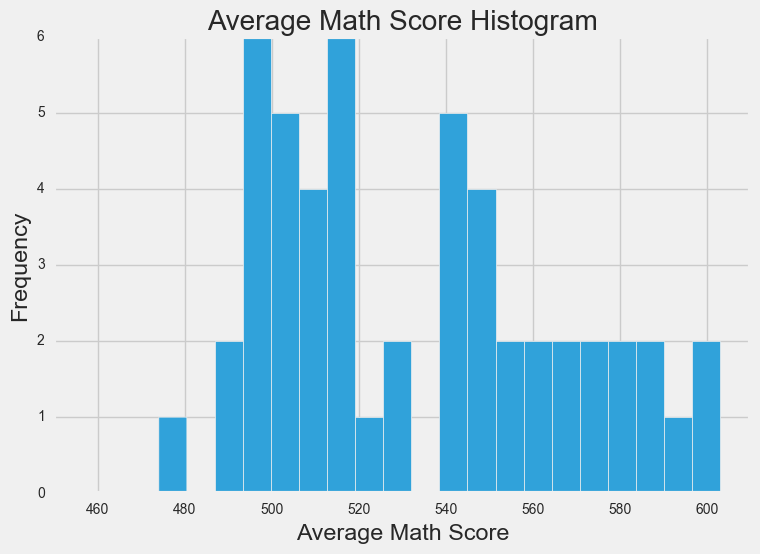

In [22]:
plt.hist(df.Math, bins=20)
plt.xlim(450, 610)
plt.xlabel('Average Math Score')
plt.ylabel('Frequency')
plt.title('Average Math Score Histogram')

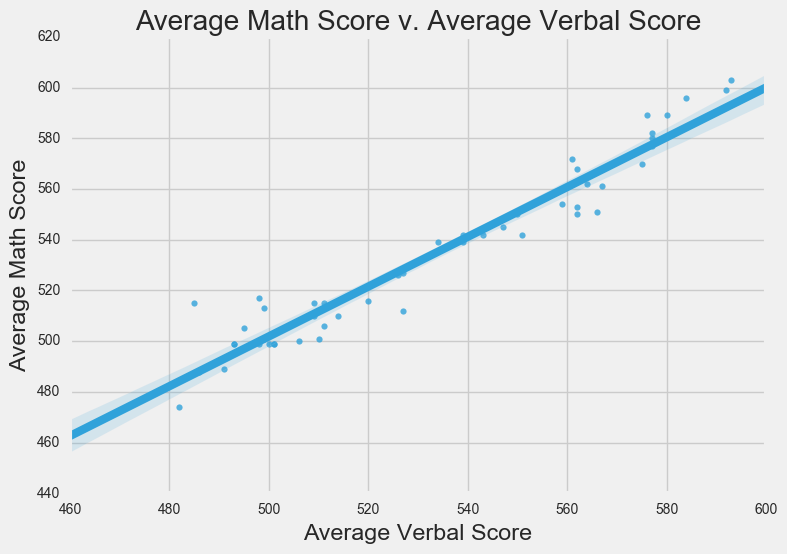

In [23]:
sns.regplot(df.Verbal, df.Math)
plt.xlabel('Average Verbal Score')
plt.ylabel('Average Math Score')
plt.title('Average Math Score v. Average Verbal Score')

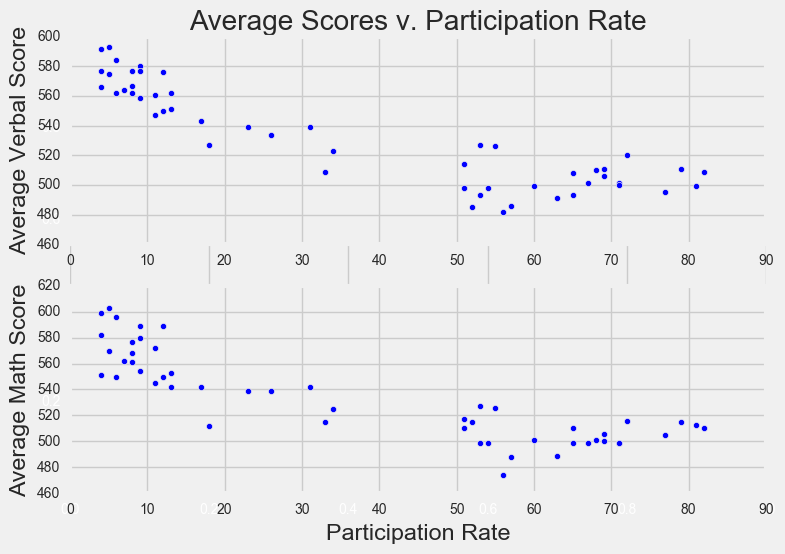

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211) #numbers are: nrows, ncols, place counting through rows then cols
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.scatter(df.Rate, df.Verbal)
ax2.scatter(df.Rate, df.Math)

ax.set_xlabel('Participation Rate')
ax1.set_ylabel('Average Verbal Score')
ax2.set_ylabel('Average Math Score')

ax.set_title('Average Scores v. Participation Rate')

##### Are there any interesting relationships to note?

Math and verbal scores appear to be positively correlated. As verbal scores increase, so do math scores.

For both math and verbal, it appears that the highest scores are at the lowest rate. Also, as I noted before, there are 2 distinct sets in terms of participation: states where participation is below 40% and states where participation is above 40%, so I separate them.

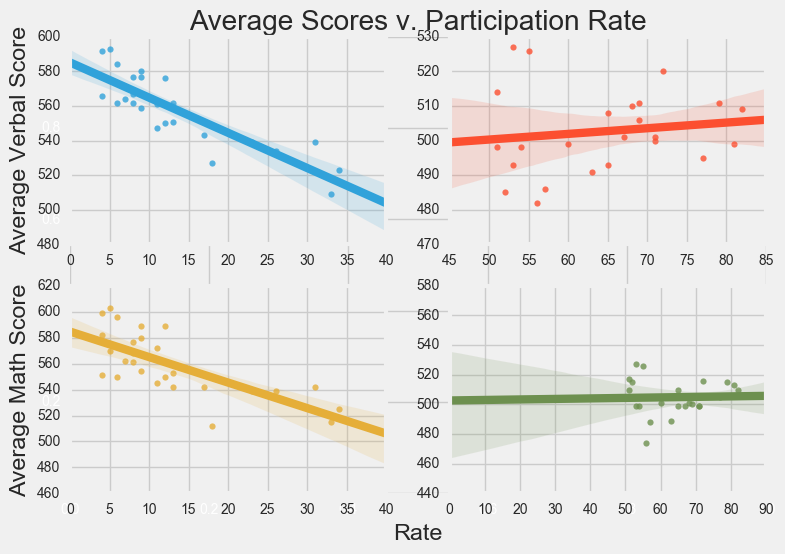

In [25]:
df_u40 = df[df.Rate <= 40]
df_a40 = df[df.Rate > 40]

fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(221) #numbers are: nrows, ncols, place counting through rows then cols
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

sns.regplot(df_u40.Rate, df_u40.Verbal, ax=ax1)
sns.regplot(df_a40.Rate, df_a40.Verbal, ax=ax2)
sns.regplot(df_u40.Rate, df_u40.Math, ax=ax3)
sns.regplot(df_a40.Rate, df_a40.Math, ax=ax4)

ax.set_xlabel('Rate')
ax1.set_ylabel('Average Verbal Score')
ax2.set_ylabel('')
ax3.set_ylabel('Average Math Score')
ax4.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

ax.set_title('Average Scores v. Participation Rate')

Now that I've separated the low participation rate states from the high participation rate states, I notice a clear negatively correlated linear relationship between scores and participation rate for the low participation rate states, but no clear pattern or relationship for score vs. participation rate for high participation rate states.

I wanted to find out why there were some states that had very low participation rates, while others had high and why there was a negative trend as participation rate increased. There are some states

##### Create box plots for each variable. 

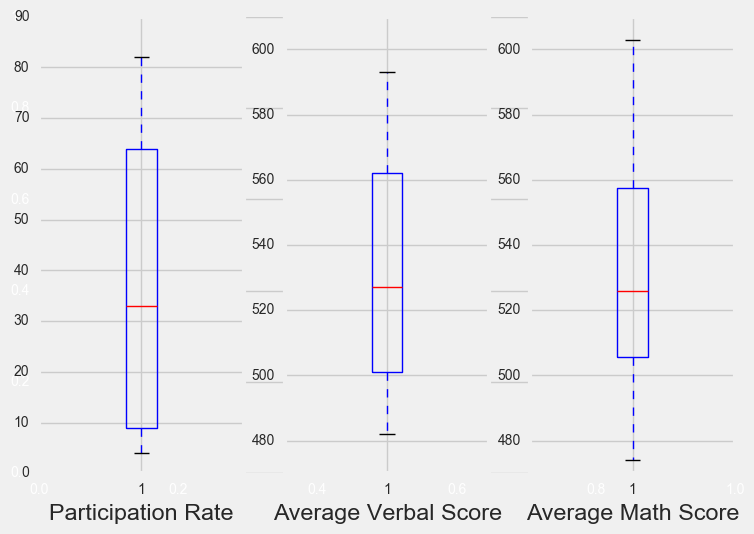

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.boxplot(df.Rate)
ax2.boxplot(df.Verbal)
ax3.boxplot(df.Math)

ax2.set_ylim([0, 100])
ax2.set_ylim([470, 610])
ax3.set_ylim([470, 610])

ax1.set_xlabel('Participation Rate')
ax2.set_xlabel('Average Verbal Score')
ax3.set_xlabel('Average Math Score')

These box plots help provide a clearer visualization for the range of the distribution of variables. The black line at the very bottom is the minimum, the blue dashed line from the bottom tick to the bottom of the box is the 1st quartile, the bottom of the blue box is the 25th percentile, the red line is the median or 50th percentile, the top of the box is the 75th percentile and the black line at the top is the maximum. The blue box represents the range from the 25th percentile to the 75th percentile, which is also known as the interquartile range or IQR.

I put the the verbal and math box plots on the same range so it would be easier to compare the two.

##### Using Tableau, create a heat map for each variable using a map of the US. 

In [27]:
## I export updated dataframe (fixed the Ohio Math score) to csv so that I can create a heat map in Tableau with the correct data.

df.to_csv('2001_sat_data.csv')

In [28]:
%%html
<div class='tableauPlaceholder' id='viz1480790946483' style='position: relative'><noscript><a href='#'><img alt='2001 SAT Participation Rate by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATParticipationRatebyState&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001SATParticipationRatebyState&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATParticipationRatebyState&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1480790946483');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [29]:
%%html
<div class='tableauPlaceholder' id='viz1480790923799' style='position: relative'><noscript><a href='#'><img alt='2001 SAT Average Math Score by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATAverageMathScorebyState&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001SATAverageMathScorebyState&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATAverageMathScorebyState&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1480790923799');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [30]:
%%html
<div class='tableauPlaceholder' id='viz1480790903597' style='position: relative'><noscript><a href='#'><img alt='2001 SAT Average Verbal Score by State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATAverageVerbalScorebyState&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='2001SATAverageVerbalScorebyState&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;20&#47;2001SATAverageVerbalScorebyState&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1480790903597');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>